In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = 'C:\\Users\\Dr. Bijay Kumar Sahu\\Desktop\\Simplilearn Study Material\\ML Project\\ML Dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head(), data.info(), data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


(   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
 0                0.38             0.53               2                   157   
 1                0.80             0.86               5                   262   
 2                0.11             0.88               7                   272   
 3                0.72             0.87               5                   223   
 4                0.37             0.52               2                   159   
 
    time_spend_company  Work_accident  left  promotion_last_5years  sales  \
 0                   3              0     1                      0  sales   
 1                   6              0     1                      0  sales   
 2                   4              0     1                      0  sales   
 3                   5              0     1                      0  sales   
 4                   3              0     1                      0  sales   
 
    salary  
 0     low  
 1  medium  
 2  mediu

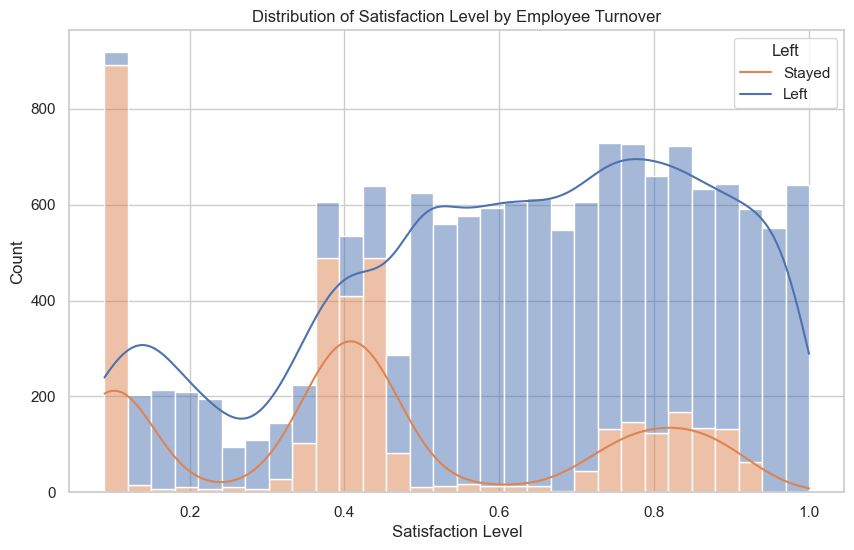

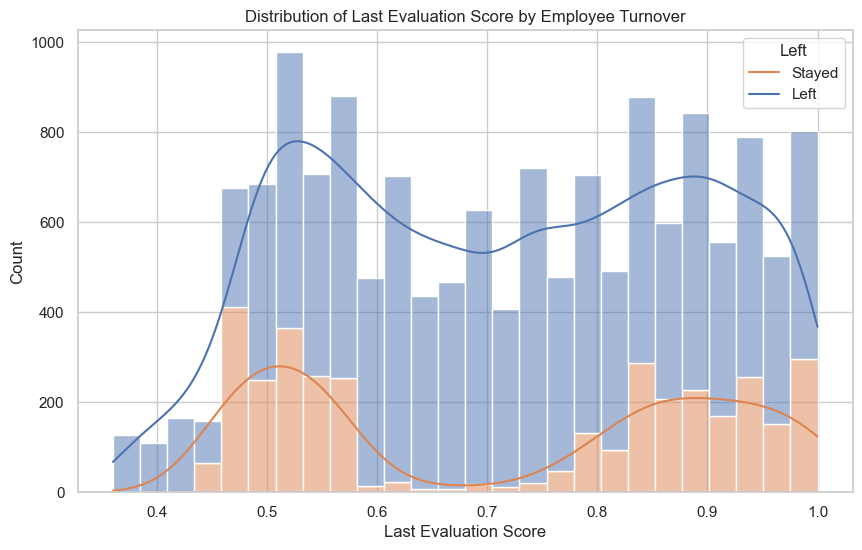

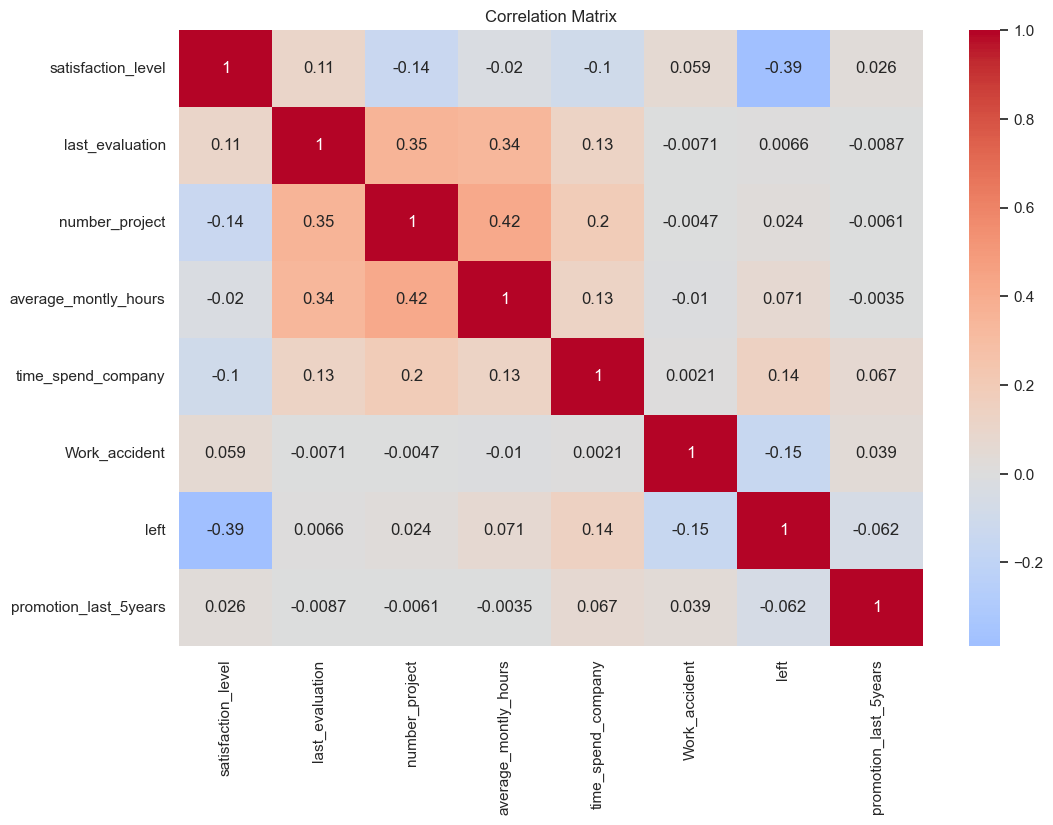

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [3]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Summary statistics of the dataset
summary_stats = data.describe()

# Visualization: Distribution of satisfaction level by whether employees left or not
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='satisfaction_level', hue='left', multiple='stack', kde=True)
plt.title('Distribution of Satisfaction Level by Employee Turnover')
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')
plt.legend(title='Left', labels=['Stayed', 'Left'])
plt.show()

# Visualization: Distribution of last evaluation score by whether employees left or not
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='last_evaluation', hue='left', multiple='stack', kde=True)
plt.title('Distribution of Last Evaluation Score by Employee Turnover')
plt.xlabel('Last Evaluation Score')
plt.ylabel('Count')
plt.legend(title='Left', labels=['Stayed', 'Left'])
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

summary_stats

In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

C:\Users\Dr. Bijay Kumar Sahu\AppData\Local\Temp\ipykernel_7896\189148892.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_employees['cluster'] = kmeans.fit_predict(scaled_features)


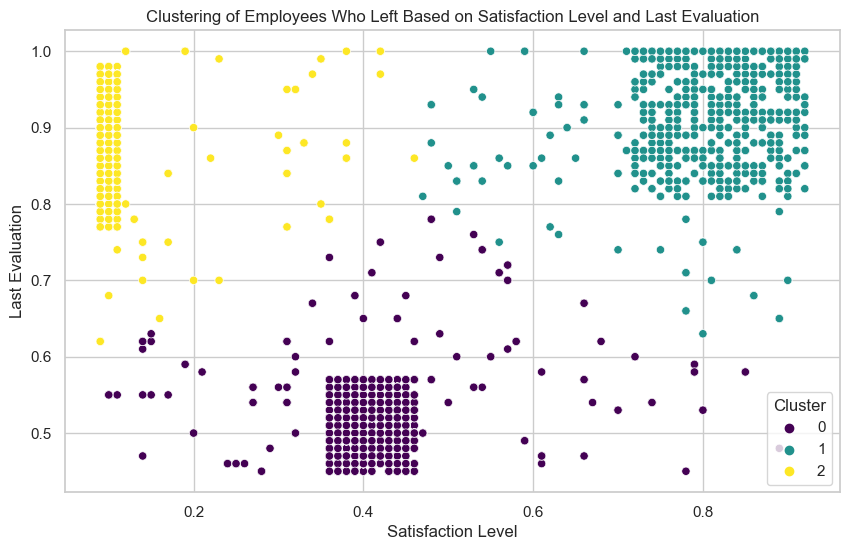

In [5]:
# Filter data for employees who left
left_employees = data[data['left'] == 1]

# Features for clustering
features = left_employees[['satisfaction_level', 'last_evaluation']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
left_employees['cluster'] = kmeans.fit_predict(scaled_features)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=left_employees['satisfaction_level'], y=left_employees['last_evaluation'], hue=left_employees['cluster'], palette='viridis')
plt.title('Clustering of Employees Who Left Based on Satisfaction Level and Last Evaluation')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.legend(title='Cluster')
plt.show()

In [9]:
from imblearn.over_sampling import SMOTE

# Features and target variable
X = data.drop(columns=['left'])
y = data['left']

# One-hot encode categorical variables
X = pd.get_dummies(X, columns=['sales', 'salary'], drop_first=True)

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=123)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the distribution of the target variable after SMOTE
print(y_resampled.value_counts())


1    11428
0    11428
Name: left, dtype: int64


In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

models = {
    'Logistic Regression': LogisticRegression(random_state=123),
    'Random Forest': RandomForestClassifier(random_state=123),
    'Gradient Boosting': GradientBoostingClassifier(random_state=123)
}

for name, model in models.items():
    scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='accuracy')
    print(f'{name} Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})')


C:\Users\Dr. Bijay Kumar Sahu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dr. Bijay Kumar Sahu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Logistic Regression Accuracy: 0.7733 (+/- 0.0195)
Random Forest Accuracy: 0.9832 (+/- 0.0038)
Gradient Boosting Accuracy: 0.9551 (+/- 0.0037)


C:\Users\Dr. Bijay Kumar Sahu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


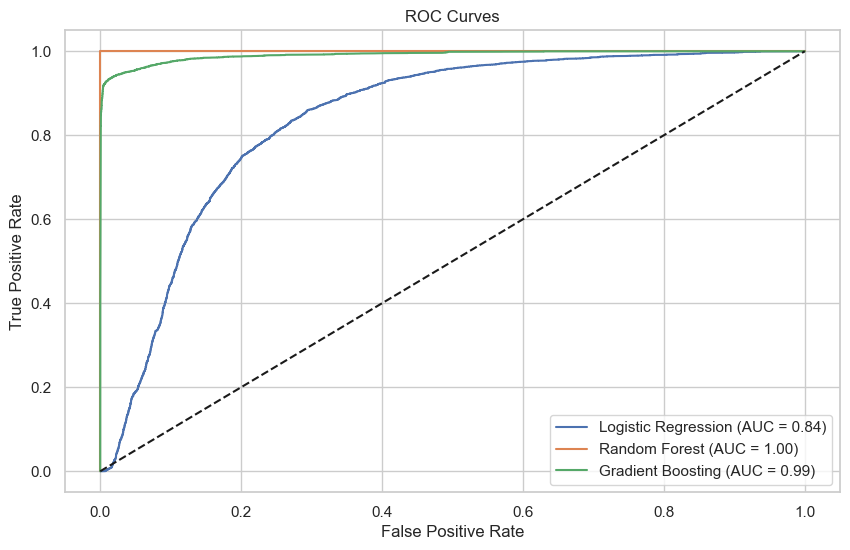

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score

# Function to plot ROC curves
def plot_roc_curve(model, X, y, label):
    y_pred_prob = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, y_pred_prob)
    auc = roc_auc_score(y, y_pred_prob)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc:.2f})')

# Plot ROC curves for each model
plt.figure(figsize=(10, 6))

for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    plot_roc_curve(model, X_resampled, y_resampled, name)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()


In [20]:
from sklearn.metrics import confusion_matrix

# Function to print confusion matrix
def print_confusion_matrix(model, X, y, label):
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    print(f'Confusion Matrix for {label}:\n{cm}\n')

# Print confusion matrices for each model
for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    print_confusion_matrix(model, X_resampled, y_resampled, name)


C:\Users\Dr. Bijay Kumar Sahu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix for Logistic Regression:
[[8610 2818]
 [2268 9160]]

Confusion Matrix for Random Forest:
[[11428     0]
 [    0 11428]]

Confusion Matrix for Gradient Boosting:
[[11162   266]
 [  649 10779]]



In [18]:
from sklearn.metrics import classification_report, confusion_matrix

best_model = RandomForestClassifier(random_state=42)  # Assume this is the best based on CV
best_model.fit(X_resampled, y_resampled)
y_pred = best_model.predict(X_resampled)

print(classification_report(y_resampled, y_pred))
print(confusion_matrix(y_resampled, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11428
           1       1.00      1.00      1.00     11428

    accuracy                           1.00     22856
   macro avg       1.00      1.00      1.00     22856
weighted avg       1.00      1.00      1.00     22856

[[11428     0]
 [    0 11428]]


In [26]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X = data.drop(columns=['left'])
y = data['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode categorical variables
X_train = pd.get_dummies(X_train, columns=['sales', 'salary'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['sales', 'salary'], drop_first=True)

# Apply SMOTE to balance the classes on the training set
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train the best model
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_resampled, y_resampled)

# Predict probabilities on the test set
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Add probabilities to the original test dataframe
X_test['turnover_probability'] = y_pred_prob
X_test['left'] = y_test.values

# Display the first few rows to check the results
X_test.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium,turnover_probability,left
6723,0.65,0.96,5,226,2,1,0,0,0,0,0,1,0,0,0,0,0,1,0.02,0
6473,0.88,0.80,3,166,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0.01,0
4679,0.69,0.98,3,214,2,0,0,0,0,0,0,0,0,1,0,0,1,0,0.04,0
862,0.41,0.47,2,154,3,0,0,0,0,0,0,0,0,1,0,0,1,0,1.00,1
7286,0.87,0.76,5,254,2,1,0,0,0,1,0,0,0,0,0,0,1,0,0.01,0


Safe Zone (Green)            2173
High-Risk Zone (Red)          645
Low-Risk Zone (Yellow)        143
Medium-Risk Zone (Orange)      39
Name: risk_zone, dtype: int64


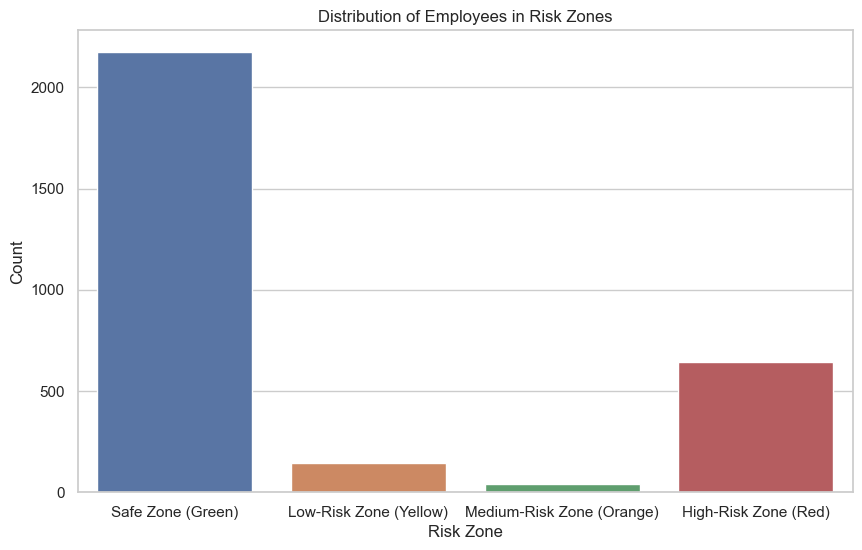

In [27]:
# Define zones based on probability score
def categorize_probability(prob):
    if prob < 0.20:
        return 'Safe Zone (Green)'
    elif prob < 0.60:
        return 'Low-Risk Zone (Yellow)'
    elif prob < 0.90:
        return 'Medium-Risk Zone (Orange)'
    else:
        return 'High-Risk Zone (Red)'

X_test['risk_zone'] = X_test['turnover_probability'].apply(categorize_probability)

# Define a color palette
colors = {
    'Safe Zone (Green)': 'green',
    'Low-Risk Zone (Yellow)': 'yellow',
    'Medium-Risk Zone (Orange)': 'orange',
    'High-Risk Zone (Red)': 'red'
}

# Display the distribution of employees in each zone
zone_counts = X_test['risk_zone'].value_counts()

# Print the distribution of risk zones
print(zone_counts)

# Visualization of the distribution of risk zones
plt.figure(figsize=(10, 6))
sns.countplot(x='risk_zone', data=X_test, order=['Safe Zone (Green)', 'Low-Risk Zone (Yellow)', 'Medium-Risk Zone (Orange)', 'High-Risk Zone (Red)'])
plt.title('Distribution of Employees in Risk Zones')
plt.xlabel('Risk Zone')
plt.ylabel('Count')
plt.show()
